In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [28]:
project_dir="results/projects/240117llama7b_10"
#project_dir="results/projects/240118llama7b_100"
#project_dir="results/projects/240117llama7b"
project_dir="results/projects/240119mixtral_self_reasoning_10/"


In [29]:
result_list=[]

def load_data(project_dir,prefix="test_"):
    for path in glob.glob(f"{project_dir}/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        generation=path.split("/")[-1].split("_")[1]
        generation=int(generation)

        mode=path.split("/")[-1].split("_")[0]
        d["generation"]=generation
        d["mode"]=mode

        #count self_reasoning data
        self_reasoning_records=0
        for gen in range(0,generation+1):
            self_reasoning_records+=len(glob.glob(f"{project_dir}/self_reasoning/{gen}_*.json"))

        d["Self-reasoning records"]=self_reasoning_records
        result_list.append(d)

    return result_list

#train_result_list=load_data(project_dir,"train_")
#test_result_list=load_data(project_dir,"test_")
result_list=load_data(project_dir,"")

In [30]:
result_df=pd.DataFrame(result_list)
result_df

,MSE,MAE,R2,Answer ratio,plot,generation,mode,Self-reasoning records
0,3584.819219,45.394792,0.624562,0.960000,"[{'name': 'xanthene', 'smiles': 'c1ccc2c(c1)Cc...",6,train,193
1,3090.006510,40.357292,0.700835,0.960000,"[{'name': 'cis-4-cyclohexene-1,2-dicarboxylic ...",11,train,305
2,4086.911793,44.240217,0.464174,0.920000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",8,test,237
3,6047.651330,52.171277,0.278672,0.940000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",7,test,216
4,3938.905357,43.539796,0.517154,0.980000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",12,test,321
5,3756.593385,41.846875,0.547464,0.960000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",10,test,280
6,5492.188351,50.562766,0.344924,0.940000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",5,test,172
7,4008.863929,44.843878,0.508579,0.980000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",14,test,358
8,5361.901383,56.527660,0.439786,0.940000,"[{'name': '1-fluoropentane', 'smiles': 'CCCCCF...",8,train,237
9,4103.167031,43.303125,0.563422,0.960000,"[{'name': '1,3-diethyl-5-methylbenzene', 'smil...",12,train,321


<Axes: xlabel='generation', ylabel='MSE'>

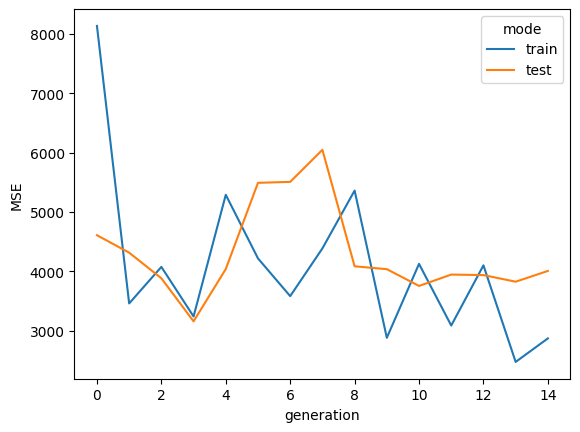

In [31]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df)

#plt.ylim(4000,12000)

<Axes: xlabel='Self-reasoning records', ylabel='MSE'>

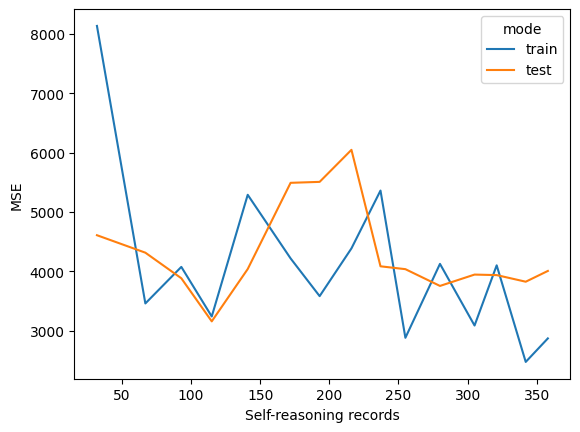

In [32]:

sns.lineplot(x="Self-reasoning records",y="MSE",hue="mode",data=result_df)

<Axes: xlabel='generation', ylabel='Self-reasoning records'>

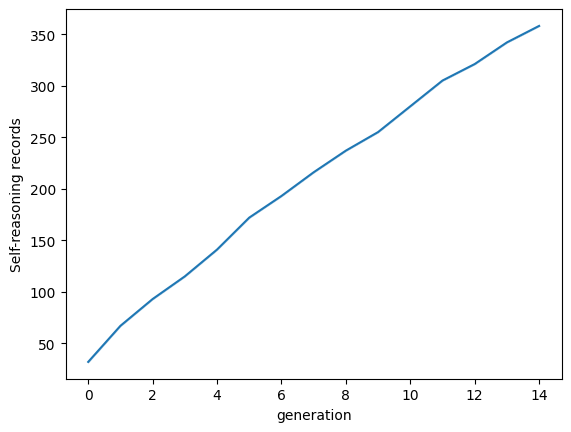

In [33]:

sns.lineplot(x="generation",y="Self-reasoning records",data=result_df)